In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/celebA/down_train.csv')
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,153577.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
1,074959.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
2,142804.jpg,-1,-1,-1,-1,-1,-1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
3,074377.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
4,020729.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,1,1,-1,-1,1


In [3]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

-1    18930
 1    13486
Name: Male, dtype: int64

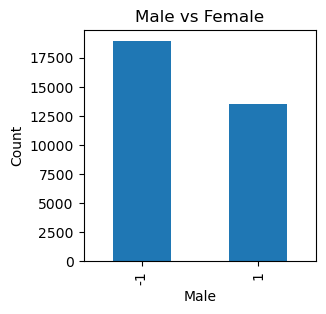

In [4]:
display(df['Male'].value_counts())
df['Male'].value_counts().plot(kind='bar', figsize=(3,3), xlabel='Male' , ylabel='Count', title='Male vs Female')
plt.show()

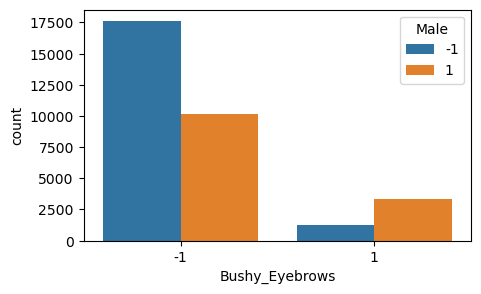

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(data = df, x = 'Smiling', hue = 'Male')
plt.show()

In [6]:
df_male = df[df['Male']==1]
df_female = df[df['Male']==-1]

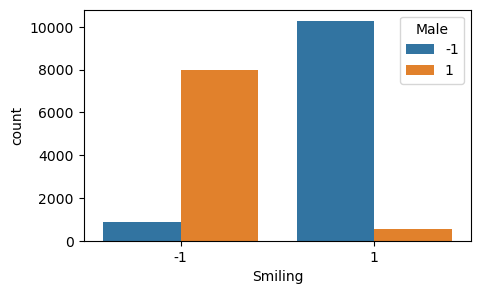

In [7]:
downsample_frac = 0.1
df_male_smiling = df_male[df_male['Smiling'] == 1].sample(frac = downsample_frac)
df_male = pd.concat([df_male_smiling, df_male[df_male['Smiling'] == -1]])

df_female_smiling = df_female[df_female['Smiling'] == -1].sample(frac = downsample_frac)
df_female = pd.concat([df_female_smiling, df_female[df_female['Smiling'] == 1]])

df_downsampled = pd.concat([df_male, df_female]).reset_index(drop=True)

plt.figure(figsize=(5,3))
sns.countplot(data = df_downsampled, x = 'Smiling', hue = 'Male')
plt.show()

In [8]:
df_downsampled.to_csv('./dataset/celebA/down_train_downsaple.csv', index=False)

In [9]:
df_downsampled['Male'].value_counts()

-1    11149
 1     8550
Name: Male, dtype: int64